In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline
# 图形支持中文显示
mpl.rcParams["font.family"] = "SimHei"
# 使用非Unicode的负号。（当使用中文字体时，需要设置）
mpl.rcParams["axes.unicode_minus"]=False
mpl.rcParams["font.size"] = 15

# 读取数据

In [2]:
data = pd.read_csv("creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# 查看原始数据集中0 和1 的数量



In [3]:
a =data['Class'].value_counts().index
a

Int64Index([0, 1], dtype='int64')

In [4]:
b = data['Class'].value_counts().values
b

array([284315,    492], dtype=int64)

Text(0,0.5,'Frequency')

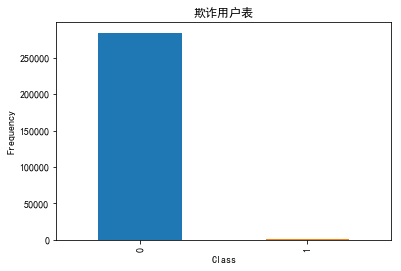

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("欺诈用户表")
plt.xlabel("Class")
plt.ylabel("Frequency")

# 处理特征之间的分布差异

In [6]:
# 转换成二维 一行一列
x = np.array(data['Amount']).reshape(-1,1)
x

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [7]:
# 将数值转换成-1到1之间
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(x)
data['normAmount'].head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: normAmount, dtype: float64

In [8]:
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


# 下采样方法
让正负样本一样多

In [9]:
# 切分数据 分成X除啦Class以外取出所有特征 y只要class特征的列
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

# 少数类中的数据点数量
#number_records_fraud 等于1的异常样本有多少个 在拿出他们的索引
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# 选择正常类的索引 normal_indices拿出样本等于的索引
normal_indices = data[data.Class == 0].index

# 在class =0  种随机的选着 选着数量为number_records_fraud
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# 将  正  负  样本和并
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# 切分数据 分成X除啦Class以外取出所有特征 y只要class特征的列
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# 显示比例
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: Deprecation

# 交叉验证 切分 训练集 测试集

In [10]:
from sklearn.cross_validation import train_test_split
#原始数据集
#切分数据集test_size拿30%测试集 random_state随机切分
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

display("交易数量训练数据集: ", len(X_train))
display("交易数量测试数据集: ", len(X_test))
display("总数量的交易: ", len(X_train)+len(X_test))

# 下采样数据集
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
display("")
display("交易数量训练数据集: ", len(X_train_undersample))
display("交易数量测试数据集: ", len(X_test_undersample))
display("总数量的交易: ", len(X_train_undersample)+len(X_test_undersample))

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'交易数量训练数据集: '

199364

'交易数量测试数据集: '

85443

'总数量的交易: '

284807

''

'交易数量训练数据集: '

688

'交易数量测试数据集: '

296

'总数量的交易: '

984

# 模型评估标准

In [11]:
#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
# 几倍的交叉验证KFold  交叉验证评估结果cross_val_score
from sklearn.cross_validation import KFold, cross_val_score
#confusion_matrix混淆矩阵
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [12]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data), n_folds=5, shuffle=False) 

    # 正则化惩罚项 惩罚力度
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    #最好的c参数
    for c_param in c_param_range:
        display('-------------------------------------------')
        display(f'C 参数:{ c_param} ')
        display('-------------------------------------------')

        recall_accs = []
        #交叉验证
        for iteration, indices in enumerate(fold,start=1):

            # 用某个C参数调用逻辑回归模型 
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # 利用训练数据拟合模型。在这种情况下，我们使用折叠部分来训练模型
            # 与指数[0]。然后，我们用索引[1]预测被分配为“测试交叉验证”的部分
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 使用训练数据中的测试指标预测数值
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 计算召回分数并将其附加到表示当前c_parameter的召回分数列表中
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            display(f'迭代{iteration}',f'打分={recall_acc} ')

        # 这些回忆分数的平均值就是我们想要保存和得到的指标。
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        display(f'综合评分{np.mean(recall_accs)}' )
        

    best_c = results_table.iloc[results_table['Mean recall score']]['C_parameter']

    
    return best_c

In [13]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

'-------------------------------------------'

'C 参数:0.01 '

'-------------------------------------------'

'迭代1'

'打分=0.958904109589041 '

'迭代2'

'打分=0.9178082191780822 '

'迭代3'

'打分=1.0 '

'迭代4'

'打分=0.972972972972973 '

'迭代5'

'打分=0.9545454545454546 '

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


'综合评分0.96084615125711'

'-------------------------------------------'

'C 参数:0.1 '

'-------------------------------------------'

'迭代1'

'打分=0.8356164383561644 '

'迭代2'

'打分=0.863013698630137 '

'迭代3'

'打分=0.9322033898305084 '

'迭代4'

'打分=0.9459459459459459 '

'迭代5'

'打分=0.8939393939393939 '

'综合评分0.8941437733404299'

'-------------------------------------------'

'C 参数:1 '

'-------------------------------------------'

'迭代1'

'打分=0.8356164383561644 '

'迭代2'

'打分=0.863013698630137 '

'迭代3'

'打分=0.9491525423728814 '

'迭代4'

'打分=0.9459459459459459 '

'迭代5'

'打分=0.8939393939393939 '

'综合评分0.8975336038489046'

'-------------------------------------------'

'C 参数:10 '

'-------------------------------------------'

'迭代1'

'打分=0.863013698630137 '

'迭代2'

'打分=0.8767123287671232 '

'迭代3'

'打分=0.9661016949152542 '

'迭代4'

'打分=0.9459459459459459 '

'迭代5'

'打分=0.8787878787878788 '

'综合评分0.9061123094092679'

'-------------------------------------------'

'C 参数:100 '

'-------------------------------------------'

'迭代1'

'打分=0.863013698630137 '

'迭代2'

'打分=0.8767123287671232 '

'迭代3'

'打分=0.9661016949152542 '

'迭代4'

'打分=0.9459459459459459 '

'迭代5'

'打分=0.8787878787878788 '

'综合评分0.9061123094092679'

In [14]:
from pyecharts import Line

attr = ['0.01','0.1','1','10','100']
v1 = [0.9545454545454546,0.8972110996954274,0.9183024720057457, 0.9183024720057457, 0.9183024720057457]
line = Line("折线图示例")
line.add("惩罚因子评分", attr, v1, is_smooth=True, mark_line=["max"])
line

In [15]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9319727891156463


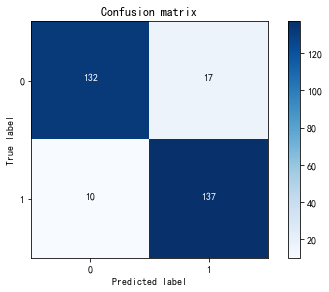

In [16]:
import itertools
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9183673469387755


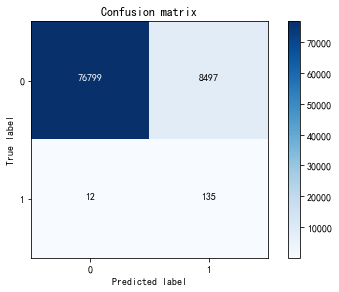

In [17]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [18]:
best_c = printing_Kfold_scores(X_train,y_train)

'-------------------------------------------'

'C 参数:0.01 '

'-------------------------------------------'

'迭代1'

'打分=0.4925373134328358 '

'迭代2'

'打分=0.6027397260273972 '

'迭代3'

'打分=0.6833333333333333 '

'迭代4'

'打分=0.5692307692307692 '

'迭代5'

'打分=0.45 '

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


'综合评分0.5595682284048672'

'-------------------------------------------'

'C 参数:0.1 '

'-------------------------------------------'

'迭代1'

'打分=0.5671641791044776 '

'迭代2'

'打分=0.6164383561643836 '

'迭代3'

'打分=0.6833333333333333 '

'迭代4'

'打分=0.5846153846153846 '

'迭代5'

'打分=0.525 '

'综合评分0.5953102506435158'

'-------------------------------------------'

'C 参数:1 '

'-------------------------------------------'

'迭代1'

'打分=0.5522388059701493 '

'迭代2'

'打分=0.6164383561643836 '

'迭代3'

'打分=0.7166666666666667 '

'迭代4'

'打分=0.6153846153846154 '

'迭代5'

'打分=0.5625 '

'综合评分0.612645688837163'

'-------------------------------------------'

'C 参数:10 '

'-------------------------------------------'

'迭代1'

'打分=0.5522388059701493 '

'迭代2'

'打分=0.6164383561643836 '

'迭代3'

'打分=0.7333333333333333 '

'迭代4'

'打分=0.6153846153846154 '

'迭代5'

'打分=0.575 '

'综合评分0.6184790221704963'

'-------------------------------------------'

'C 参数:100 '

'-------------------------------------------'

'迭代1'

'打分=0.5522388059701493 '

'迭代2'

'打分=0.6164383561643836 '

'迭代3'

'打分=0.7333333333333333 '

'迭代4'

'打分=0.6153846153846154 '

'迭代5'

'打分=0.575 '

'综合评分0.6184790221704963'

查全率:  1.0
查全率:  1.0
查全率:  1.0
查全率:  0.9863945578231292
查全率:  0.9319727891156463
查全率:  0.8571428571428571
查全率:  0.8299319727891157
查全率:  0.7278911564625851
查全率:  0.564625850340136


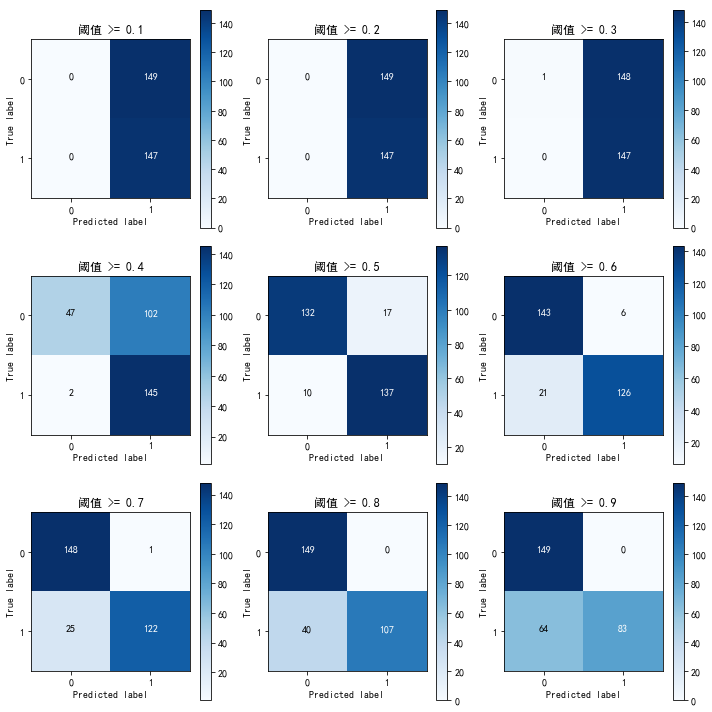

In [19]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())

y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("查全率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='阈值 >= %s'%i) 


# 查准率和查全率是一对矛盾的度量。
# 想找出可能欺诈的用户，那只能降低阈值，可以提高查准率， 但是这样又会误杀掉那些没有欺诈行为的人，查准全就低了  
# 如果提升阈值，可以提高查全率 减少啦误差但是 大部分欺诈的用户没有查出来。查准率就低了
  

# 查全率阈值 选择0.3 可以准确预测
# 根据业务需要请谨慎选着阈值